# create figures for med4 DE long term 

In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(ggrepel)

In [3]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [4]:
hpath_fname = file.path('..', 'genomes', 'MED4', 'MED4_protein_list.csv')
hpath_df = read.csv(hpath_fname)


In [94]:
df_all_orig = read_csv(file.path('DE_results', 'MED4_all_FC_results.csv'))



Rows: 24377 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): contrast, gene_id, Assay, contrast1
dbl (5): logFC, AveExpr, pvalue, padj, Length
lgl (2): down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [95]:
df_all_orig = df_all_orig %>%
    filter(contrast1 %in% c('LATEvsC1_prot', 'LATEvsC1P1_rna'))

In [96]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [97]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

In [98]:
names(hpath_df); names(df_all_orig)

[1] "Name"               "gene"               "locus_tag"         
 [4] "old_locus_tag"      "source"             "start"             
 [7] "end"                "strand"             "Note"              
[10] "exception"          "inference"          "product"           
[13] "protein_id"         "gene_length"        "path_id"           
[16] "main"               "sub"                "path"              
[19] "ecpath"             "Category"           "Membrane.transport"
[22] "kegg_gene1"         "kegg_gene2"

[1] "contrast"  "gene_id"   "logFC"     "AveExpr"   "pvalue"    "padj"     
 [7] "Assay"     "contrast1" "Length"    "down"      "up"

In [99]:
df_all = left_join(df_all_orig, hpath_df, by=c('gene_id'='locus_tag'))

In [100]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Other,804
Uncharacterized,594
Genetic Info,545
Metabolism,355
AA/Nucleotide,320
Energy/Carbohydrate/Glycan,189
Membrane transport,161
Photosynthesis/Carbon fixation,134
AA/Nucleotide;Energy/Carbohydrate/Glycan,72


In [101]:
unique(df_all$contrast1)

[1] "LATEvsC1_prot"  "LATEvsC1P1_rna"

In [102]:
t(head(df_all))

contrast,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1
gene_id,TX50_RS01980,TX50_RS00040,TX50_RS04695,TX50_RS01970,TX50_RS05170,TX50_RS05585
logFC,3.191075,-1.443788,1.373159,3.706744,2.210139,2.786227
AveExpr,0.9167156,1.5845359,2.2254880,3.6657560,-1.3469405,-1.7260158
pvalue,6.252913e-10,1.202458e-08,1.731707e-08,2.510390e-08,2.650587e-08,3.478220e-08
padj,8.904149e-07,7.127836e-06,7.127836e-06,7.127836e-06,7.127836e-06,7.127836e-06
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot
Length,852,2439,912,1491,1134,954
down,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
up,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE


In [103]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
Proteome,FALSE,208
Proteome,TRUE,206
RNA,FALSE,207
RNA,TRUE,178


# Top up and down regulated genes

In [212]:
df_all %>%
    filter(padj < 0.05) %>% top_n(50, logFC) %>% 
    select(Assay,logFC,gene, product, Category, gene_length/3) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category,gene_length
<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
Proteome,3.191075,,ABC transporter ATP-binding protein,Nitrogen metabolism,854
Proteome,3.706744,,ABC transporter substrate-binding protein,Nitrogen metabolism,1493
Proteome,2.786227,,alpha-E domain-containing protein,Other,956
Proteome,3.436089,ntrB,nitrate ABC transporter permease,Nitrogen metabolism,782
Proteome,2.800708,(glnB),P-II family nitrogen regulator,Env. Info/Cellular Process,338
Proteome,2.599965,(ureB),urease subunit beta,AA/Nucleotide,320
Proteome,3.297569,,circularly permuted type 2 ATP-grasp protein,Other,1445
Proteome,2.769544,(dinG),DNA helicase,Genetic Info,1448
Proteome,3.287265,,DUF1830 domain-containing protein,Other,227


In [209]:
df_all %>%
    filter(padj < 0.05, Category=='Metabolism') %>% top_n(-20, logFC) %>% 
    select(Assay,logFC,gene, product, Category, path) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category,path
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Proteome,-1.606829,(dxr),1-deoxy-D-xylulose-5-phosphate reductoisomerase,Metabolism,00900 Terpenoid backbone biosynthesis [PATH:ko00900]
Proteome,-1.442711,,long-chain acyl-[acyl-carrier-protein] reductase,Metabolism,99980 Enzymes with EC numbers
Proteome,-3.062849,(pepE),peptidase E,Metabolism,01002 Peptidases and inhibitors [BR:ko01002]
Proteome,-1.251517,chlP,geranylgeranyl reductase,Metabolism,00860 Porphyrin metabolism [PATH:ko00860];00900 Terpenoid backbone biosynthesis [PATH:ko00900]
Proteome,-1.620371,acsF,magnesium-protoporphyrin IX monomethyl ester (oxidative) cyclase,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]
RNA,-1.685898,bcp,thioredoxin-dependent thiol peroxidase,Metabolism,99980 Enzymes with EC numbers
RNA,-1.430310,fabD,ACP S-malonyltransferase,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];00333 Prodigiosin biosynthesis [PATH:ko00333];01004 Lipid biosynthesis proteins [BR:ko01004]
RNA,-1.268876,(menF),isochorismate synthase,Metabolism,00130 Ubiquinone and other terpenoid-quinone biosynthesis [PATH:ko00130];01053 Biosynthesis of siderophore group nonribosomal peptides [PATH:ko01053]
RNA,-1.538546,"(cobS,cobV)",adenosylcobinamide-GDP ribazoletransferase,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]


In [105]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [106]:
dput(names(df_all))

c("contrast", "gene_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "Length", "down", "up", "Name", "gene", 
"old_locus_tag", "source", "start", "end", "strand", "Note", 
"exception", "inference", "product", "protein_id", "gene_length", 
"path_id", "main", "sub", "path", "ecpath", "Category", "Membrane.transport", 
"kegg_gene1", "kegg_gene2")


In [107]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [108]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [109]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS07555,,high light inducible protein,,,NA,NA,7.163547,7.016344e-24
TX50_RS09500,,hypothetical protein,,,NA,NA,5.287747,5.587907e-45
TX50_RS09840,,hypothetical protein,,,NA,NA,4.940470,6.618466e-54
TX50_RS09690,,hypothetical protein,,,NA,NA,4.811467,3.088460e-24
TX50_RS04605,,hypothetical protein,,,NA,NA,4.775865,1.221015e-28
TX50_RS01970,,ABC transporter substrate-binding protein,09102 Energy metabolism;09131 Membrane transport;09183 Protein families: signaling and cellular processes,00910 Nitrogen metabolism [PATH:ko00910];02000 Transporters [BR:ko02000];02010 ABC transporters [PATH:ko02010],3.706744,7.127836e-06,3.489122,1.194365e-18
TX50_RS05100,,DUF1830 domain-containing protein,,,3.287265,1.100366e-04,3.388137,2.387735e-13
TX50_RS01975,ntrB,nitrate ABC transporter permease,09102 Energy metabolism;09131 Membrane transport;09183 Protein families: signaling and cellular processes,00910 Nitrogen metabolism [PATH:ko00910];02000 Transporters [BR:ko02000];02010 ABC transporters [PATH:ko02010],3.436089,7.127836e-06,2.466096,4.766029e-05
TX50_RS01985,cynS,cyanase,09102 Energy metabolism,00910 Nitrogen metabolism [PATH:ko00910],3.559702,1.308647e-04,1.795342,5.732250e-03


In [110]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS09770,,hypothetical protein,,,NA,NA,-3.9715639,1.565508e-03
TX50_RS09810,,hypothetical protein,,,NA,NA,-3.8127732,1.892925e-16
TX50_RS07415,,LOG family protein,,,-1.548083,0.0440394151,-3.2392804,1.452656e-21
TX50_RS09805,,hypothetical protein,,,NA,NA,-3.0010224,8.824035e-03
TX50_RS01790,,hypothetical protein,,,NA,NA,-2.9665253,2.624547e-10
TX50_RS05775,,oligoketide cyclase,,,-3.089786,0.0004806765,-1.7602647,1.899661e-09
TX50_RS06610,"(wecA,tagO,rfe)",undecaprenyl/decaprenyl-phosphate alpha-N-acetylglucosaminyl 1-phosphate transferase,09107 Glycan biosynthesis and metabolism;09181 Protein families: metabolism,00542 O-Antigen repeat unit biosynthesis [PATH:ko00542];00552 Teichoic acid biosynthesis [PATH:ko00552];00572 Arabinogalactan biosynthesis - Mycobacterium [PATH:ko00572];01003 Glycosyltransferases [BR:ko01003];01005 Lipopolysaccharide biosynthesis proteins [BR:ko01005],-2.659823,0.0119511553,-1.3640186,1.965563e-07
TX50_RS07345,,GAF domain-containing protein,,,-2.437843,0.0017520753,-1.0693021,2.108802e-02
TX50_RS06640,"(rfbD,rmlD)",sugar nucleotide-binding protein,09107 Glycan biosynthesis and metabolism;09109 Metabolism of terpenoids and polyketides;09110 Biosynthesis of other secondary metabolites,00521 Streptomycin biosynthesis [PATH:ko00521];00523 Polyketide sugar unit biosynthesis [PATH:ko00523];00541 O-Antigen nucleotide sugar biosynthesis [PATH:ko00541],-2.428226,0.0487356304,-0.6255909,1.000000e+00


# Vulcano plot

In [111]:
df_degenes2 = df_all %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>2)

In [112]:
df_degenes = df_all %>% 
    filter(padj < 0.05) 

In [113]:
df_degenes2 %>% count(Assay, Category) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )

Category,Proteome,RNA
<chr>,<int>,<int>
Other,10,15
Uncharacterized,6,43
Nitrogen metabolism,5,3
AA/Nucleotide,3,2
Membrane transport,2,2
Energy/Carbohydrate/Glycan,2,NA
Metabolism,1,2
Genetic Info,1,1
Env. Info/Cellular Process,1,NA


In [114]:
# these are all pseudo genes
df_all %>% filter(is.na(Category)) #%>% count(product)

contrast,gene_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,Length,down,⋯,gene_length,path_id,main,sub,path,ecpath,Category,Membrane.transport,kegg_gene1,kegg_gene2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
treatment_long.term_vs_ref,TX50_RS03060,-0.02921639,2218.84347,1.0000000,1,RNA,LATEvsC1P1_rna,347,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,TX50_RS03640,-0.51505237,91.60120,0.9756101,1,RNA,LATEvsC1P1_rna,260,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,TX50_RS07310,-0.04479608,15.89914,1.0000000,1,RNA,LATEvsC1P1_rna,266,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [115]:
df_all = df_all %>% filter(!is.na(Category)) #%>% count(product)


In [116]:
category_move_to_other = c('Env. Info/Cellular Process', 'Genetic Info')
category_move_to_metabolism = c('Energy/Carbohydrate/Glycan')
category_move_to_aa = c('AA/Nucleotide;Energy/Carbohydrate/Glycan')
df_all = df_all %>%
    mutate(Category2 = Category) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_other, 'Other', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_metabolism, 'Metabolism', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_aa, 'AA/Nucleotide', Category2)) 

In [117]:
df_all %>% count(Assay, Category2) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )


Category2,Proteome,RNA
<chr>,<int>,<int>
Other,644,776
Metabolism,264,280
AA/Nucleotide,195,197
Uncharacterized,175,419
Membrane transport,72,89
Photosynthesis/Carbon fixation,62,72
high light inducible,6,13
Nitrogen metabolism,6,6


In [118]:
df_degenes%>% count(gene) %>% arrange()

gene,n
<chr>,<int>
,416
(accA),1
"(afuA,fbpA)",1
"(afuC,fbpC)",1
(ahpC),1
"(aroF,aroG,aroH)",2
(arsC),1
(arsR),1
(atpB),1


In [119]:
names(df_all)

[1] "contrast"           "gene_id"            "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Length"            
[10] "down"               "up"                 "Name"              
[13] "gene"               "old_locus_tag"      "source"            
[16] "start"              "end"                "strand"            
[19] "Note"               "exception"          "inference"         
[22] "product"            "protein_id"         "gene_length"       
[25] "path_id"            "main"               "sub"               
[28] "path"               "ecpath"             "Category"          
[31] "Membrane.transport" "kegg_gene1"         "kegg_gene2"        
[34] "Category2"

In [120]:
df_all$log.padj = -log10(df_all$padj)

In [131]:
dput(unique(df_all$Category2))

c("Nitrogen metabolism", "Other", "AA/Nucleotide", "Membrane transport", 
"Uncharacterized", "Photosynthesis/Carbon fixation", "Metabolism", 
"high light inducible")


In [166]:
cat_order = c(
    "Nitrogen metabolism", 
    "Photosynthesis/Carbon fixation", 
    "AA/Nucleotide", 
    "Membrane transport", 
    "Uncharacterized", 
    "high light inducible",
    "Metabolism", 
    "Other"
)


my.cols <- c(
  "Nitrogen metabolism" = "#1b9e77",         # Teal green
  "Photosynthesis/Carbon fixation" = "#66a61e",            # Olive green
  "AA/Nucleotide" = "#7570b3",              # Purple
  "Membrane transport" = "#e7298a",         # Pink
  "Uncharacterized" = "#d95f02",  # Orange
  "high light inducible" = "#e6ab02",       # Mustard yellow
  #"Metabolism" = "#c0c0c0",                 # Brown
  "Metabolism" = "#a6761d",                 # Brown
  "Other" = "#b0b0b0"                       # Gray
)

df_all$Category2 = factor(df_all$Category2, levels = cat_order)

#my.cols <- c(brewer.pal(length(unique(df_all$Category2))-1, "Set3"), 'grey34')

In [202]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

In [183]:
colSums(is.na(df_all))

contrast            gene_id              logFC            AveExpr 
                 0                  0                  0                  0 
            pvalue               padj              Assay          contrast1 
                 1                  1                  0                  0 
            Length               down                 up               Name 
                 0                  1                  0                  0 
              gene      old_locus_tag             source              start 
                 0                  0                  0                  0 
               end             strand               Note          exception 
                 0                  0                  0                  0 
         inference            product         protein_id        gene_length 
                 0                  0                  0                  0 
           path_id               main                sub               path 
                 0                  0                  0                  0 
            ecpath           Category Membrane.transport         kegg_gene1 
                 0                  0                  0                  0 
        kegg_gene2          Category2           log.padj    capped.log.padj 
                 0                  0                  1                  1 
      capped.logFC 
                 0

In [169]:
df_labels$gene 

[1] "(gyrA)"           "(ilvE)"           "urtC"             "ntrB"            
 [5] "(glnB)"           "(ureB)"           "sat"              "lhgO"            
 [9] "acs"              "urtA"             "(ftnA,ftn)"       "purS"            
[13] "(dxr)"            "(dinG)"           "mgtE"             "(pepE)"          
[17] "thyX"             "bchD"             "(aroF,aroG,aroH)" "cynS"            
[21] "(ureA)"           "glnA"             "sppA"             "ureC"            
[25] "(ridA,tdcF)"      "(frmA,adhC)"      "amt"              "speA"            
[29] "trxA"             "psbA"             "(hemA)"           "(bamA)"          
[33] "psbD"             "psbB"

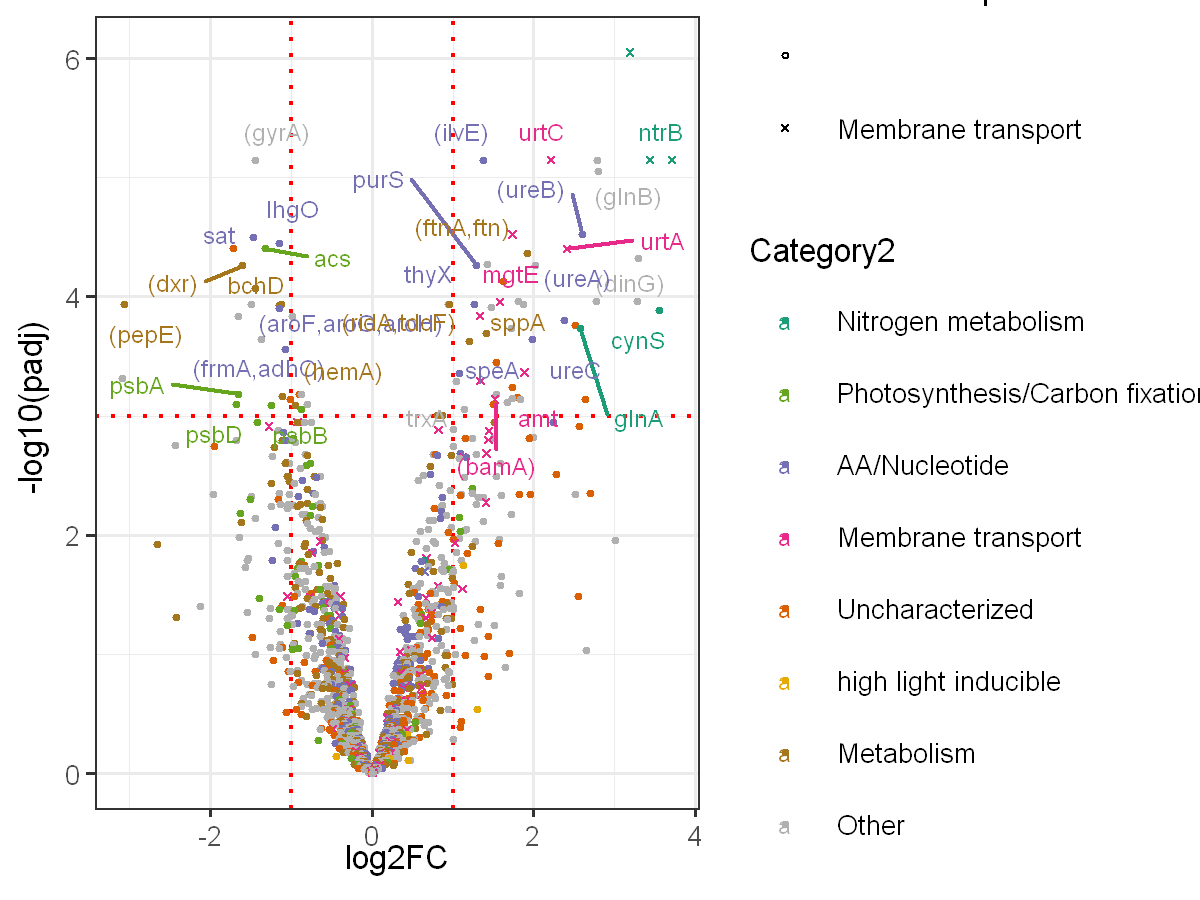

In [205]:
library(ggrepel)
assay = 'Proteome'

df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    geom_point(size=0.5, stroke=0.5 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=2)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [206]:
ggsave('figures/MED4_longterm_DE_Proteome.svg', height = 3, width = 4)

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


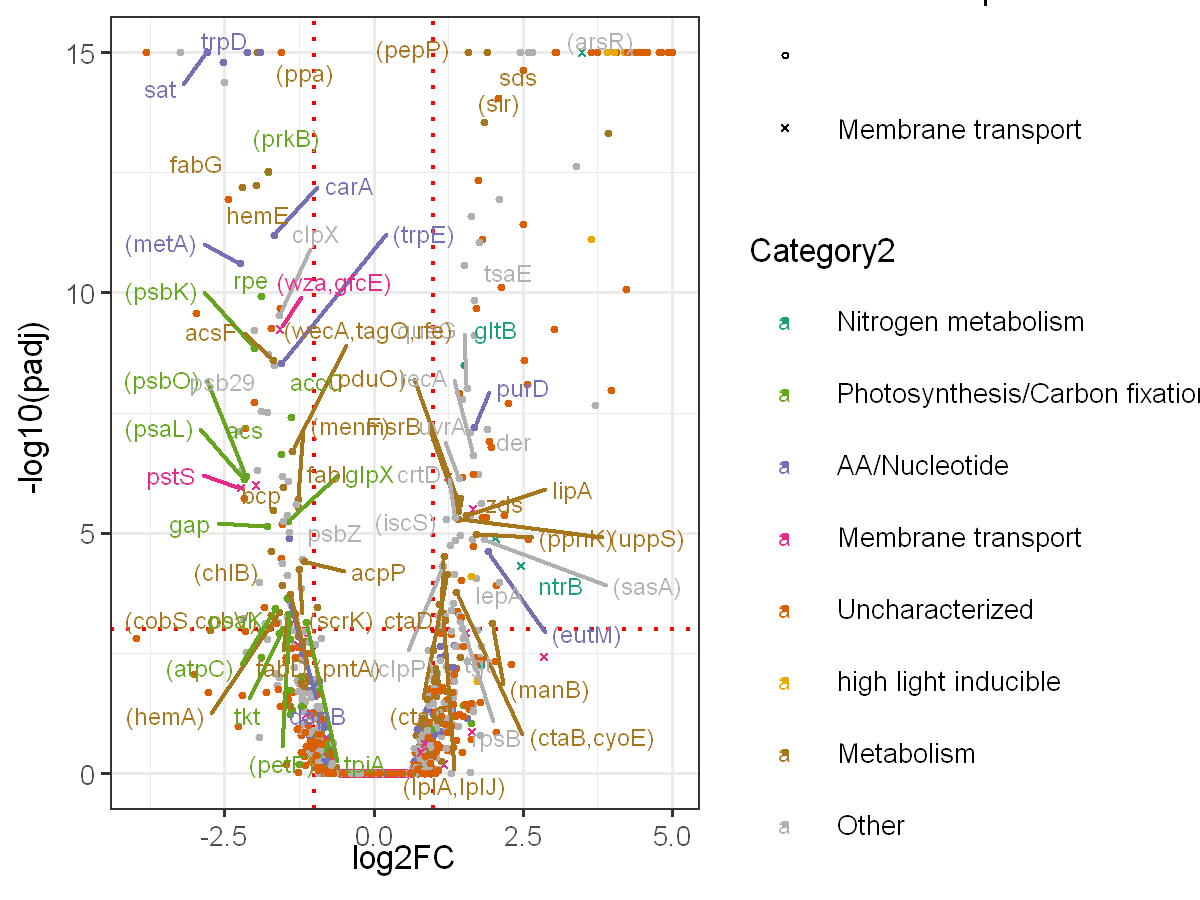

In [207]:
library(ggrepel)
assay = 'RNA'


ymax <- 15
df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
xmax <- 5
df_all$capped.logFC <- pmin(df_all$logFC, xmax)


df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = capped.logFC, y =capped.log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    geom_point(size=0.5, stroke=0.5 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( capped.logFC, capped.log.padj ,label=gene), max.overlaps = Inf, size=2)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [208]:
ggsave('figures/MED4_longterm_DE_RNA.svg', height = 3, width = 4)


Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


In [128]:
df_all$kegg_gene

Warning message:
"Unknown or uninitialised column: `kegg_gene`."


NULL

In [188]:
help(ggsave)

ggsave {ggplot2},R Documentation
filename,File name to create on disk.
plot,"Plot to save, defaults to last plot displayed."
device,"Device to use. Can either be a device function (e.g. png), or one of ""eps"", ""ps"", ""tex"" (pictex), ""pdf"", ""jpeg"", ""tiff"", ""png"", ""bmp"", ""svg"" or ""wmf"" (windows only)."
path,Path of the directory to save plot to: path and filename are combined to create the fully qualified file name. Defaults to the working directory.
scale,Multiplicative scaling factor.
"width, height, units","Plot size in units (""in"", ""cm"", ""mm"", or ""px""). If not supplied, uses the size of current graphics device."
dpi,"Plot resolution. Also accepts a string input: ""retina"" (320), ""print"" (300), or ""screen"" (72). Applies only to raster output types."
limitsize,"When TRUE (the default), ggsave() will not save images larger than 50x50 inches, to prevent the common error of specifying dimensions in pixels."
bg,"Background colour. If NULL, uses the plot.background fill value from the plot theme."
...,"Other arguments passed on to the graphics device function, as specified by device."
